In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("AMZN.csv", parse_dates = ["Date"], index_col = "Date")

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,398.799988,399.359985,394.019989,397.970001,397.970001,2137800
2014-01-03,398.290009,402.709991,396.220001,396.440002,396.440002,2210200
2014-01-06,395.850006,397.000000,388.420013,393.630005,393.630005,3170600
2014-01-07,395.040009,398.470001,394.290009,398.029999,398.029999,1916000
2014-01-08,398.470001,403.000000,396.040009,401.920013,401.920013,2316500


In [4]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
test = pd.read_csv("AMZNtest.csv")

In [6]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,1465.199951,1553.359985,1460.930054,1539.130005,1539.130005,7983100
1,2019-01-03,1520.010010,1538.000000,1497.109985,1500.280029,1500.280029,6975600
2,2019-01-04,1530.000000,1594.000000,1518.310059,1575.390015,1575.390015,9182600
3,2019-01-07,1602.310059,1634.560059,1589.189941,1629.510010,1629.510010,7993200
4,2019-01-08,1664.689941,1676.609985,1616.609985,1656.579956,1656.579956,8881400


In [7]:
train_df = df[["Open"]]
test_df = test[["Open"]]

In [8]:
train_df.shape

(1258, 1)

In [9]:
size=int(train_df.shape[0]*0.8)
size

1006

In [10]:
xtrain=train_df.iloc[:size]
xtrain.shape

(1006, 1)

In [11]:
xtest = train_df.iloc[size:]
xtest.shape

(252, 1)

In [12]:
size=int(test_df.shape[0]*0.8)
size

16

In [13]:
ytrain=test_df.iloc[:size]
ytrain.shape

(16, 1)

In [14]:
ytest = test_df.iloc[size:]
ytest.shape

(5, 1)

In [15]:
test.shape

(21, 7)

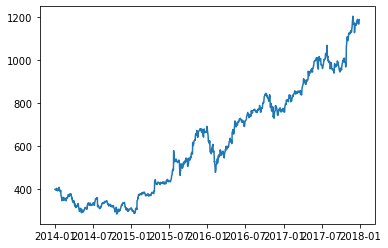

In [16]:
plt.plot(xtrain)

In [17]:
from sklearn.preprocessing import MinMaxScaler
mmc = MinMaxScaler()
mmc_xtrain = mmc.fit_transform(xtrain)
mmc_xtest = mmc.transform(xtest)
mmc_xtrain.shape, mmc_xtest.shape

((1006, 1), (252, 1))

In [18]:
mmc_xtrain.shape,ytrain.shape

((1006, 1), (16, 1))

In [19]:
def feature_selection(n_steps,data):
    x = []
    y = []
    for i in range(n_steps,len(data)):
        x.append(data[i-n_steps:i,0])
        y.append(data[i,0])
    return np.array(x),np.array(y)

In [20]:
n_steps = 20
xtrain,ytrain = feature_selection(n_steps,mmc_xtrain)

In [21]:
xtrain.shape,ytrain.shape

((986, 20), (986,))

In [22]:
xtrain = xtrain.reshape((xtrain.shape[0],xtrain.shape[1],1))#row,column,feature

In [23]:
ytrain

array([0.09490702, 0.08102296, 0.07082175, 0.06692161, 0.06844255,
       0.08102296, 0.08388014, 0.08413002, 0.07825265, 0.06876849,
       0.08141405, 0.07700331, 0.07413526, 0.06996349, 0.07391796,
       0.06604164, 0.07452634, 0.08197896, 0.07911091, 0.08278291,
       0.08076221, 0.08636798, 0.08661786, 0.09739483, 0.09797062,
       0.09591736, 0.09407048, 0.08908396, 0.10018686, 0.09603684,
       0.09920911, 0.10094734, 0.10252259, 0.09369027, 0.09408135,
       0.08222884, 0.07564532, 0.07901313, 0.06382539, 0.06045758,
       0.0630106 , 0.05832826, 0.06691074, 0.06238051, 0.05513428,
       0.03975099, 0.0407179 , 0.0478772 , 0.05019122, 0.03215714,
       0.03614421, 0.03509041, 0.03994657, 0.03841476, 0.04298845,
       0.05171216, 0.05286373, 0.04918088, 0.03460152, 0.02129324,
       0.01308014, 0.01488355, 0.02143448, 0.02826788, 0.02386798,
       0.02730098, 0.01212411, 0.00697464, 0.00670304, 0.01075525,
       0.01977231, 0.01966366, 0.01479662, 0.00912567, 0.01234

### Model 1 using LSTM

In [24]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

lstm_model=Sequential()
lstm_model.add(LSTM(200,activation='relu', input_shape = (20,1)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer = "adam",loss = "mean_squared_error")
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 200)               161600    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = lstm_model.fit(xtrain,ytrain,epochs = 50,batch_size = 200)

Epoch 1/50
5/5 [==============================] - 4s 139ms/step - loss: 0.1908
Epoch 2/50
5/5 [==============================] - 1s 164ms/step - loss: 0.0826
Epoch 3/50
5/5 [==============================] - 1s 169ms/step - loss: 0.0135
Epoch 4/50
5/5 [==============================] - 1s 128ms/step - loss: 0.0075
Epoch 5/50
5/5 [==============================] - 1s 130ms/step - loss: 0.0107
Epoch 6/50
5/5 [==============================] - 1s 133ms/step - loss: 0.0048
Epoch 7/50
5/5 [==============================] - 1s 125ms/step - loss: 0.0036
Epoch 8/50
5/5 [==============================] - 1s 132ms/step - loss: 0.0014
Epoch 9/50
5/5 [==============================] - 1s 148ms/step - loss: 0.0013
Epoch 10/50
5/5 [==============================] - 1s 170ms/step - loss: 0.0011
Epoch 11/50
5/5 [==============================] - 1s 181ms/step - loss: 7.2354e-04
Epoch 12/50
5/5 [==============================] - 1s 149ms/step - loss: 6.3504e-04
Epoch 13/50
5/5 [========================

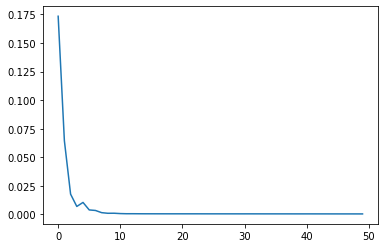

In [26]:
plt.plot(history.history["loss"])

In [27]:
xtest,ytest = feature_selection(n_steps,mmc_xtest)

In [28]:
xtest = xtest.reshape((xtest.shape[0],xtest.shape[1],1))

In [29]:
ypred = lstm_model.predict(xtest)

In [30]:
prediction = mmc.inverse_transform(ypred)

In [31]:
prediction

array([[1364.2744],
       [1377.952 ],
       [1395.9093],
       [1411.7935],
       [1429.7782],
       [1438.6245],
       [1441.5437],
       [1452.8063],
       [1461.171 ],
       [1462.2765],
       [1461.2681],
       [1461.2588],
       [1463.6211],
       [1473.0591],
       [1481.1033],
       [1487.8341],
       [1497.6428],
       [1507.3267],
       [1517.0446],
       [1527.1665],
       [1538.0994],
       [1547.7932],
       [1555.2201],
       [1557.3656],
       [1561.3049],
       [1570.2405],
       [1578.3367],
       [1587.2375],
       [1597.5737],
       [1611.8605],
       [1628.1013],
       [1641.0347],
       [1652.4061],
       [1660.6614],
       [1664.9299],
       [1668.1471],
       [1674.1   ],
       [1676.9276],
       [1676.1099],
       [1673.5288],
       [1675.2909],
       [1662.5997],
       [1644.9653],
       [1629.195 ],
       [1610.3232],
       [1587.6241],
       [1576.8251],
       [1565.7477],
       [1555.6229],
       [1547.2463],


In [32]:
ytest

array([1.21542026, 1.2677082 , 1.26086389, 1.29605207, 1.21482269,
       1.17010685, 1.26520945, 1.24422046, 1.18317615, 1.17359425,
       1.19669091, 1.21876629, 1.28464498, 1.27430252, 1.2624826 ,
       1.30431948, 1.31557446, 1.31555271, 1.33061005, 1.34723187,
       1.3418108 , 1.3353902 , 1.28704585, 1.31435771, 1.35668341,
       1.3494264 , 1.37493481, 1.38960107, 1.42121498, 1.44659303,
       1.42599512, 1.42382234, 1.41127449, 1.37985618, 1.37530414,
       1.41453366, 1.39174122, 1.36299539, 1.35320701, 1.39926996,
       1.26303667, 1.21849469, 1.23111853, 1.20261168, 1.16660871,
       1.25759384, 1.24453542, 1.23916872, 1.24672995, 1.2548235 ,
       1.25488875, 1.26536156, 1.26086389, 1.27965848, 1.33653096,
       1.36756905, 1.38710232, 1.37133879, 1.35950813, 1.27498695,
       1.30433035, 1.46620242, 1.41024247, 1.38929685, 1.40859114,
       1.38580958, 1.38846031, 1.41767334, 1.42382234, 1.42925429,
       1.43846685, 1.4411937 , 1.43359985, 1.41600039, 1.40481

In [33]:
ytest = mmc.inverse_transform(ytest.reshape(-1,1))
ytest

array([[1403.170044],
       [1451.300049],
       [1445.      ],
       [1477.390015],
       [1402.619995],
       [1361.459961],
       [1449.      ],
       [1429.680054],
       [1373.48999 ],
       [1364.670044],
       [1385.930054],
       [1406.25    ],
       [1466.890015],
       [1457.369995],
       [1446.48999 ],
       [1485.      ],
       [1495.359985],
       [1495.339966],
       [1509.199951],
       [1524.5     ],
       [1519.51001 ],
       [1513.599976],
       [1469.099976],
       [1494.23999 ],
       [1533.199951],
       [1526.52002 ],
       [1550.      ],
       [1563.5     ],
       [1592.599976],
       [1615.959961],
       [1597.      ],
       [1595.      ],
       [1583.449951],
       [1554.530029],
       [1550.339966],
       [1586.449951],
       [1565.469971],
       [1539.01001 ],
       [1530.      ],
       [1572.400024],
       [1447.      ],
       [1406.      ],
       [1417.619995],
       [1391.380005],
       [1358.23999 ],
       [14

In [34]:
from sklearn.metrics import r2_score,mean_squared_error
print('mse',mean_squared_error(ytest,prediction))
print('RMSE',np.sqrt(mean_squared_error(ytest,prediction)))
print('r2_score',r2_score(ytest,prediction))

mse 40869.58030601555
RMSE 202.16226231919634
r2_score -0.3095866483219163


### Model 2 - GRU

In [35]:
from keras.models import Sequential
from keras.layers import GRU,Dense
gru_model = Sequential()
gru_model.add(GRU(100,activation = 'relu',input_shape = (n_steps,1)))
gru_model.add(Dense(1))
gru_model.compile(optimizer = 'adam',loss = 'mean_squared_error')
gru_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 100)               30900     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 31,001
Trainable params: 31,001
Non-trainable params: 0
_________________________________________________________________


In [36]:
history = gru_model.fit(xtrain,ytrain,epochs=50,batch_size=100)

Epoch 1/50
10/10 [==============================] - 2s 21ms/step - loss: 0.1352
Epoch 2/50
10/10 [==============================] - 0s 22ms/step - loss: 0.0428
Epoch 3/50
10/10 [==============================] - 0s 21ms/step - loss: 0.0102
Epoch 4/50
10/10 [==============================] - 0s 22ms/step - loss: 0.0046
Epoch 5/50
10/10 [==============================] - 0s 22ms/step - loss: 8.8371e-04
Epoch 6/50
10/10 [==============================] - 0s 21ms/step - loss: 5.9257e-04
Epoch 7/50
10/10 [==============================] - 0s 21ms/step - loss: 3.4157e-04
Epoch 8/50
10/10 [==============================] - 0s 22ms/step - loss: 3.0690e-04
Epoch 9/50
10/10 [==============================] - 0s 21ms/step - loss: 2.6853e-04
Epoch 10/50
10/10 [==============================] - 0s 26ms/step - loss: 2.6601e-04
Epoch 11/50
10/10 [==============================] - 0s 24ms/step - loss: 2.2494e-04
Epoch 12/50
10/10 [==============================] - 0s 26ms/step - loss: 2.7195e-04
Epoch

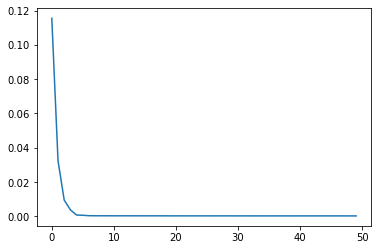

In [37]:
plt.plot(history.history["loss"])

#### Validation

In [38]:
ypred = gru_model.predict(xtest)
predicted = mmc.inverse_transform(ypred)
predicted

array([[1404.3019],
       [1409.5508],
       [1437.677 ],
       [1448.3711],
       [1470.6769],
       [1440.259 ],
       [1400.6787],
       [1428.6047],
       [1433.8967],
       [1405.5953],
       [1385.8398],
       [1387.8567],
       [1400.9076],
       [1441.3401],
       [1457.1892],
       [1458.2281],
       [1478.9224],
       [1494.9136],
       [1502.3601],
       [1513.0273],
       [1526.4325],
       [1529.9923],
       [1527.8309],
       [1501.4735],
       [1501.6398],
       [1524.1241],
       [1532.4548],
       [1549.368 ],
       [1565.2184],
       [1588.8801],
       [1613.1965],
       [1614.0515],
       [1612.3053],
       [1604.2659],
       [1583.5681],
       [1570.6716],
       [1585.0165],
       [1581.4042],
       [1564.5847],
       [1550.9226],
       [1568.1665],
       [1507.5541],
       [1453.3805],
       [1433.7399],
       [1411.4983],
       [1383.4612],
       [1416.3019],
       [1428.4264],
       [1431.8347],
       [1436.9812],


result = pd.DataFrame({'Actual':list(ytest),'Predicted':list(ypred)})
result

In [39]:
from sklearn.metrics import r2_score,mean_squared_error
print('mse',mean_squared_error(ytest,ypred))
print('RMSE',np.sqrt(mean_squared_error(ytest,ypred)))
print('r2_score',r2_score(ytest,ypred))

mse 2825718.6503520445
RMSE 1680.9874033888668
r2_score -89.54468846284153
